In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns

Возьмите датасет Mortality and Water Hardnesshttps://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛКВ этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. 

Города дополнительно поделены на северные и южные.

1.Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный графикb.

Рассчитать коэффициенты корреляции Пирсона и Спирменаc.

Построить модель линейной регрессииd.

Рассчитать коэффициент детерминацииe.

Вывести график остатков

2.Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группыb.

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [44]:
df_water = pd.read_csv('water.csv')
print(df_water.head())
df_water_South = df_water[(df_water.location == 'South')]
print(df_water_South.head())
df_water_North = df_water[(df_water.location == 'North')]
print(df_water_North.head())

   Unnamed: 0 location        town  mortality  hardness
0           1    South        Bath       1247       105
1           2    North  Birkenhead       1668        17
2           3    South  Birmingham       1466         5
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18
    Unnamed: 0 location         town  mortality  hardness
0            1    South         Bath       1247       105
2            3    South   Birmingham       1466         5
7            8    South  Bournemouth       1299        78
9           10    South     Brighton       1359        84
10          11    South      Bristol       1392        73
   Unnamed: 0 location        town  mortality  hardness
1           2    North  Birkenhead       1668        17
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18
5           6    North      Bolton       1558        10
6           7    North      Bootle  

# All location

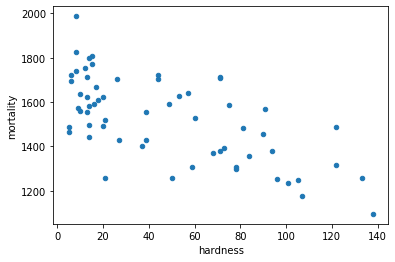

In [97]:
#Строим точечный график коррекляции
df_water.plot(kind='scatter', x='hardness', y='mortality')
#наблюдается линейная обратная корреляция

In [98]:
#Рассчитываем коэффициент корреляции Пирсона
df_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [99]:
#Рассчитываем коэффициент корреляции Спирмена
df_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [49]:
#Определяем переменные для построения модели регрессии
X = df_water[['hardness']]
y = df_water['mortality']

In [50]:
#формируем выборки в соотношении 70 & 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
#обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#получаем параметр a, коэффициент линейной регрессии
model.coef_

array([-3.13167087])

In [53]:
# Получаем параметр b
model.intercept_

1668.9722977277095

In [54]:
# применяем обученную модель к тестовой выборке
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [55]:
считаем коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

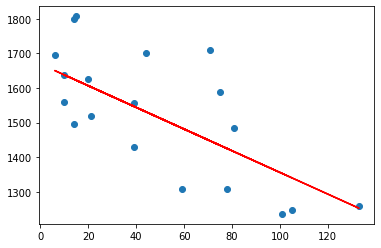

In [56]:
#визуализируем результат
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [57]:
#добавляем константу
X_const = sm.add_constant(X_train)

In [58]:
#выводим основные параметры модели
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.83e-06
Time:                        09:42:16   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

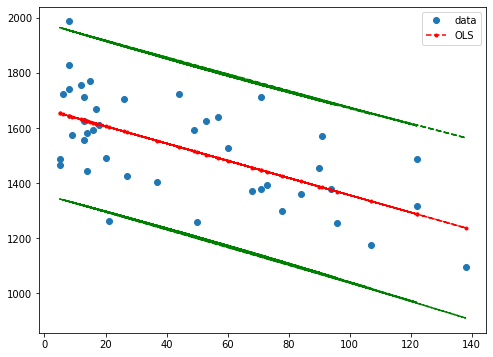

In [59]:
#визуализируем модель с границами доверительного интервала
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

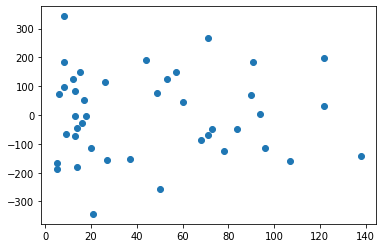

In [60]:
# получаем остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

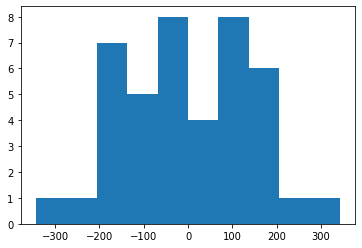

In [61]:
#оцениваем распределениес остатков
plt.hist(results.resid)

In [ ]:
#повторяем все для датафреймов с отфильтрованными Location

# South

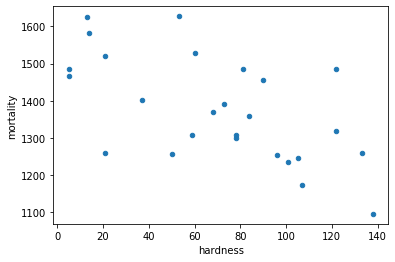

In [62]:
df_water_South.plot(kind='scatter', x='hardness', y='mortality')

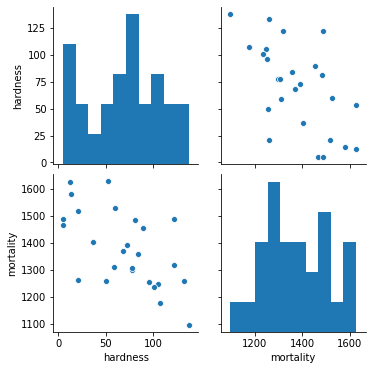

In [63]:
sns.pairplot(df_water_South[['hardness', 'mortality']])

In [64]:
df_water_South[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [65]:
df_water_South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [66]:
X = df_water_South[['hardness']]
y = df_water_South['mortality']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
model.coef_

array([-3.51342921])

In [70]:
model.intercept_

1640.2204603423374

In [71]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [72]:
model.score(X_test, y_test)

-2.551922301235205

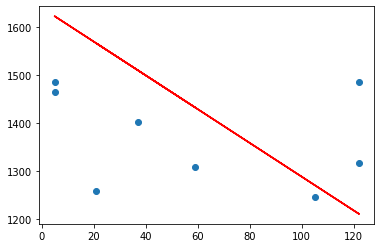

In [73]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [74]:
X_const = sm.add_constant(X_train)

In [75]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.30e-05
Time:                        09:42:17   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

C:\Users\mkskr\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


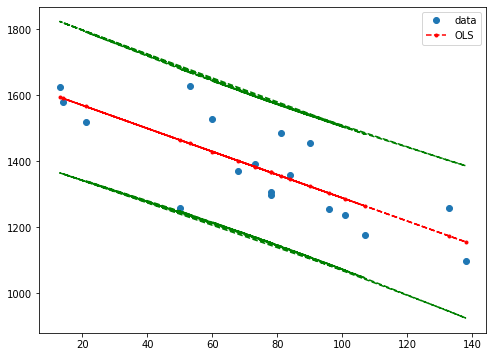

In [76]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

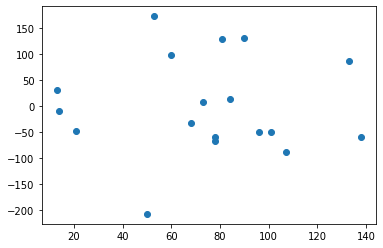

In [77]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <a list of 10 Patch objects>)

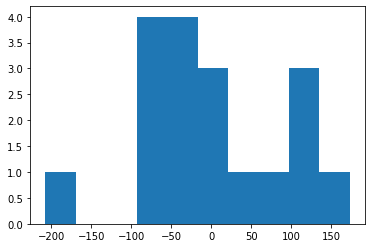

In [78]:
plt.hist(results.resid)

# North

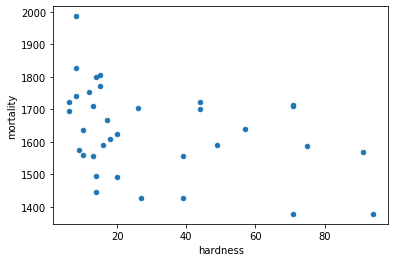

In [79]:
df_water_North.plot(kind='scatter', x='hardness', y='mortality')

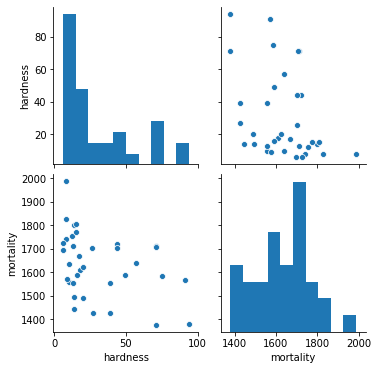

In [80]:
sns.pairplot(df_water_North[['hardness', 'mortality']])

In [81]:
df_water_North[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [82]:
df_water_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [83]:
X = df_water_North[['hardness']]
y = df_water_North['mortality']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
model.coef_

array([-1.97686226])

In [87]:
model.intercept_

1688.150229031281

In [88]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [89]:
model.score(X_test, y_test)

0.018885304285745863

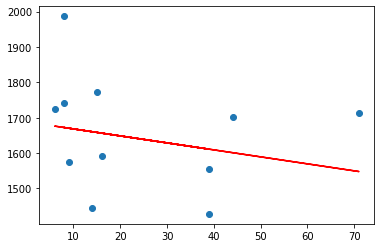

In [90]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [91]:
X_const = sm.add_constant(X_train)

In [92]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Tue, 20 Oct 2020   Prob (F-statistic):             0.0316
Time:                        09:42:19   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

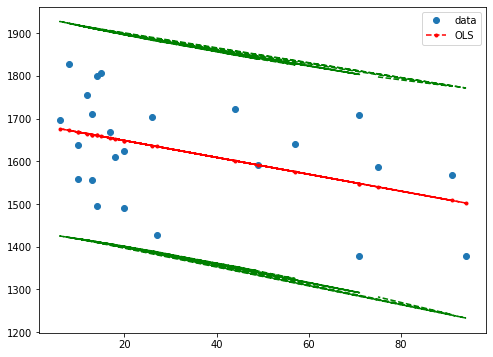

In [93]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

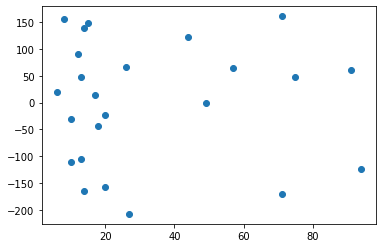

In [94]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <a list of 10 Patch objects>)

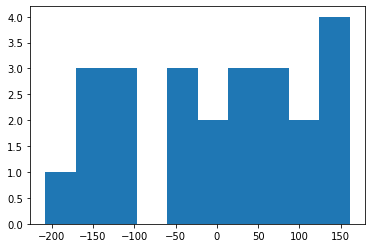

In [95]:
plt.hist(results.resid)

Чем ниже уровень кальция в воде, тем выше смертность.

Коэффициент коррекляции сохраняется как для всех данных в целомЮ, так и для отдельных групп регионов в частности.

Степень корреляции для данных в целом и Южного региона средняя, для северного региона, уровень корреляции ниже среднего